> ### EEE2020-04: Data Structures & Algorithms

# Assignment \# V: Sorting

**<div style="text-align: right"> Due date: June 19, 2020. </div>** 
**<div style="text-align: right"> Please upload your file @ yscec by 9:00 PM. </div>** 
<div style="text-align: right"> Jaehyeon Moon(문재현): <a href="mailto:tw02137@yonsei.ac.kr">tw02137@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Donghyeon Baek(백동현): <a href="mailto:dh_baek@yonsei.ac.kr">dh_baek@yonsei.ac.kr</a> 

-------------------------------


### *Assignment Instructions:*
1. Write a program implementing a particular algorithm to solve a given problem.
2. You can use both Korean and English for your report.
3. **Analyze the algorithm, theoretically and empirically.** 
4. **Report your results.**  
5. <span style="color:red">**DO NOT modify**</span> the names of methods, and their input arguments.  
6. **For all problems, DO NOT use any built-in sorting methods, such as `sorted()` or `numpy.sort()`.**  
    - You must do assignments and labs yourself. 
    - <span style="color:red">**Do not copy any part of your friends’ code.**</span>
    - Otherwise, you will get a F grade.

-----------------

<h2><span style="color:blue">[2016145015] [이두현]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2020-06-14 16:11:17.481418


-------------------------------

### # PROBLEM I (15 POINTS)

You are given randomly-ordered 1000 numbers ranging from 0 to 9999 without overlapping.  
Suppose that the total number of odd and even numbers are same.  

To this end,
> (a) Implement a **bubble sort** algorithm which sorts the numbers in **ascending** order,  
and a **shell sort** algorithm which sorts the numbers in **descending** order. **[4 points]**  
>  
> (b) Visualize the amount of time required to run algorithms in (a).  
You should visualize the runtime for each sorting algorithm, when N = 10, 20, ... , 500.  
Use a `random_numbers()` method to generate random numbers. **[5 points]**  
>  
> (c) Complete a `sort_numbers()` method. It sorts the numbers satisfying following conditions. **[6 points]**  
>> 1. Odd numbers and even numbers **alternate with** each other. 
>> 2. Odd numbers are sorted in an **ascending** order, and even numbers are sorted in a **descending** order.  
>> 3. So the smallest odd number comes first, and the smallest even number comes last.
>> 4. Use **bubble sort** or **shell sort** algorithms you've implemented.

* Use a **`time.time()`** method to calculate time intervals.

In [2]:
# DO NOT change this code
import numpy as np

def random_numbers(num = 1000):
    np.random.seed(1)
    num_even = num // 2
    numbers = np.random.choice(5000, num, replace = False) * 2
    idx = np.random.choice(num, num_even, replace = False)
    numbers[idx] += 1
    return numbers

In [3]:
# Code for (a)

def bubble_sort(x): # 2 pts
    for i in range(len(x)-1, 0, -1):
        for j in range(i):
            if x[j] > x[j+1]:
                temp = x[j]
                x[j] = x[j+1]
                x[j+1] = temp
    
def shell_sort(x): # 3 pts
    gap = len(x) // 2
    while gap > 0:
        for i in range(gap):
            gap_insertion_sort(x, i, gap)
        gap //= 2
        
def gap_insertion_sort(x, start ,gap):
    for i in range(start + gap, len(x), gap):
        current = x[i]
        position = i
        
        while position >= gap and x[position-gap] < current:
            x[position] = x[position-gap]
            position = position -gap
        x[position] = current

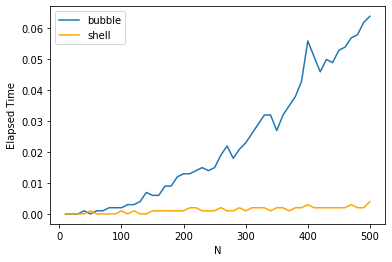

In [4]:
# Code for (b)

import time
import matplotlib.pyplot as plt

bs = []
ss = []

for i in range(10,510,10):
    x = random_numbers(i)
    bs_start = time.time()
    bubble_sort(x)
    bs_end = time.time()
    bs.append(bs_end - bs_start)
    ss_start = time.time()
    shell_sort(x)
    ss_end = time.time()
    ss.append(ss_end - ss_start)

plt.xlabel('N')
plt.ylabel('Elapsed Time')
plt.plot(range(10,510,10), bs, label = 'bubble')
plt.plot(range(10,510,10), ss, 'orange', label = 'shell')
plt.legend()
plt.show()

In [5]:
# Code for (c)

def sort_numbers(num_list):
    odd = []
    even = []
    for i in range(len(num_list)):
        if num_list[i] % 2 == 0: #짝수
            even.append(num_list[i])
        else: # 홀수
            odd.append(num_list[i])
    bubble_sort(odd)
    shell_sort(even)
    for i in range(len(num_list)):
        if i % 2 == 0:
            num_list[i] = odd[i//2]
            
        else:
            num_list[i] = even[i//2]

In [6]:
# This code is for validation; DO NOT change this code

test_bubble = np.array([1,5,3,4,2,6])
test_shell = test_bubble.copy()
test = test_bubble.copy()

bubble_sort(test_bubble)
shell_sort(test_shell)

print(test_bubble, test_shell)

sort_numbers(test)
print(test)

[1 2 3 4 5 6] [6 5 4 3 2 1]
[1 6 3 4 5 2]


### Description :

## (a)
### 1. bubble_sort          
for문 두개를 이용해서 앞에 있는 숫자가 뒤에 있는 숫자보다 큰 경우에 뒤로 보내는 방법을 하나하나 다 해줬습니다. 첫번째 for문에서 처음에는 list 전체 크기에서 맨 앞에서부터 다 비교해서 가장 큰 숫자 맨뒤로 보내고 그 다음에는 list크기보다 1 작게 해서 두번째로 큰 수를 찾아서 list 맨뒤에서 두번째에 놓고 이런식을 반복했습니다.        

### 2. shell_sort         
gap을 먼저 len(x)//2 로 해주고 x를 gap만큼 increment를 가지는 sublist들로 나눠준다음에 gap_insertion_sort를 해줍니다. 그래서 gap_insertion_sort에서 current가 sublist안에서 current 앞에 있는 값보다 큰경우 current를 앞으로 보내줘서 sublist를 descending order로 sorting하고 gap을 계속해서 2로 나눠줘서 1이 될때까지 줄여줘서 전체 list를 insertion sorting을 하면서 list를 descending order로 sorting하게 됩니다. 


## (b)
bubble sorting하는데 걸리는 시간을 넣어줄 bs라는 리스트 만들어주고, shell sorting 하는데 걸리는 시간을 넣어줄 ss라는 리스트를 만들어줍니다. 그리고 for문으로 10부터 500까지 10씩 증가하게 해주면서 x = random_numbers(i)로 리스트의 크기를 10부터 500까지 10씩 늘려주면서 시간을 측정합니다. 그래서 각 sorting을 시작하기전에 start를 time.time()으로 시간을 딱 재고, 끝나고나서 time.time()으로 end 시간을 측정해서 end-start를 각각 bs, ss 리스트에 append 해줍니다. 그래서 plt.plot으로 x축에 10부터 500까지 10씩 증가하게 만들어주고(리스트의 크기를 나타냄) y축에는 측정한 시간이 넣어져있는 리스트를 넣어준 후에 plt.show()로 그래프를 나타냈습니다. colab으로 돌린게 좀 더 모양이 예뻐서 첨부했습니다.    
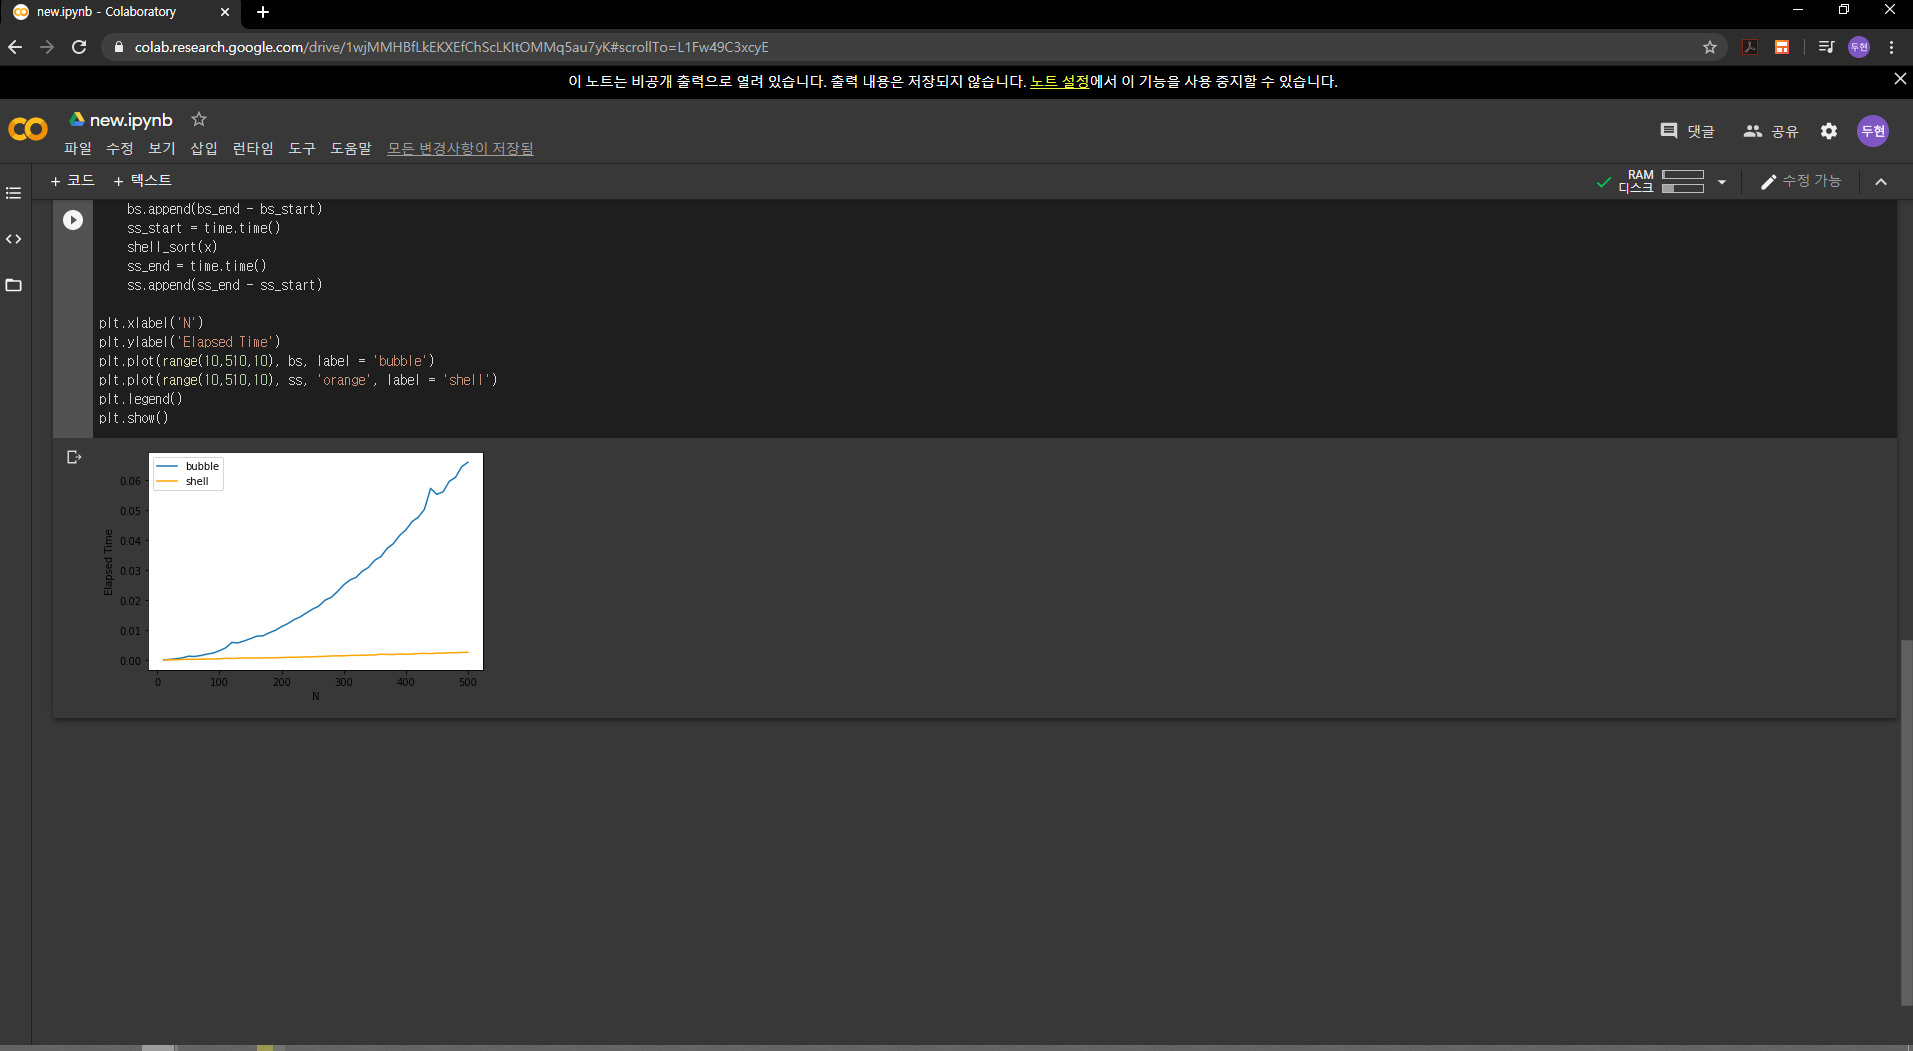     

## (c)
홀수 리스트 odd와 짝수 리스트 even을 만들어주고, num_list에서 짝수는 even에 홀수는 odd에 append해줬습니다. 그리고 나서 odd 리스트는 bubble_sort로 ascending order로 even 리스트는 shell_sort로 descending order로 sorting 했습니다. 그리고 for문으로 num_list에서 index가 짝수인 경우(0,2,4,6 ...) odd[i//2]로 odd에서 순서대로 넣어주고, index가 홀수인 경우에도 마찬가지로 even[i//2]로 even에서 순서대로 넣어줘서 조건을 만족하도록 하였습니다.

### # PROBLEM II (15 POINTS)

Suppose that you are a teacher in a classroom, and you may need to designate ID numbers to students.  
So you decided to **SORT** the students according to some criterion.  
The attributes belonging to the students are arranged in the `students.csv` file.  
  
(a) Arrange the students satisfying following conditions: **[6 points]** 
> 1. Sort the students in an *alphabetical* order, with the name.  
> 2. Use an **insertion sort** only.   
  
(b) Again, arrange the students satisfying following conditions: **[9 points]**  
> 1. Sort the students in a *descending* order, with the height (rounded to integers).  
> 2. When two students have the same height, sort the students in a *reverse alphabetical* order, with the name.  
> 3. Use a **merge sort** only.  

### Answer:

In [7]:
import numpy as np
import pandas as pd

def insertion_sort(items): # 이름 알파벳 순서로
    for i in range(1, len(items)):
        current = items[i].copy()
        position = i
        
        while position > 0 and items[position-1][0] > current[0]:
            items[position] = items[position-1]
            position = position - 1
        items[position] = current
        
def merge_sort(items): # (b)
    if len(items[0]) > 1:
        if len(items) > 1:
            mid = len(items) // 2
            left_half = items[:mid].copy()
            right_half = items[mid:].copy()

            merge_sort(left_half)
            merge_sort(right_half)

            i=0 
            j=0 
            k=0

            while i < len(left_half) and j < len(right_half): 
                if left_half[i][2] > right_half[j][2]:
                    items[k] = left_half[i]
                    i=i+1 
                elif left_half[i][2] == right_half[j][2]:
                    if left_half[i][0] < right_half[j][0]:
                        items[k] = right_half[j]
                        j=j+1
                    else:
                        items[k] = left_half[i]
                        i=i+1
                else:
                    items[k] = right_half[j]
                    j=j+1
                k=k+1

            while i < len(left_half): 
                items[k] = left_half[i] 
                i=i+1
                k=k+1

            while j < len(right_half): 
                items[k] = right_half[j] 
                j=j+1
                k=k+1

In [8]:
# DO NOT change this code; this code is for validation

students = pd.read_csv('./students.csv').values
upper, lower = students[:20].copy(), students.copy()
insertion_sort(upper)
merge_sort(lower)
students_pd = np.concatenate([upper, lower[:20], lower[20:]], axis = 1)
students_pd = pd.DataFrame(students_pd, columns = ['Name', 'Sex', 'Height'] * 3, index = range(1, 21))
students_pd

Name Sex Height      Name Sex Height       Name Sex Height
1       Alfie   M    164     James   M    195     Camila   F    168
2      Amelia   F    155       Leo   M    185       Noah   M    167
3      Archie   M    164   Freddie   M    183      Sofia   F    165
4         Ava   F    154    Harper   F    182      Harry   M    165
5   Charlotte   F    157    Thomas   M    180     Archie   M    164
6        Emma   F    170     Emily   F    180      Alfie   M    164
7       Ethan   M    179     Jacob   M    179      Avery   F    163
8     Freddie   M    183    George   M    179      Oscar   M    162
9      George   M    179     Ethan   M    179     Olivia   F    160
10     Harper   F    182  Muhammad   M    178    Abigail   F    159
11      Harry   M    165   William   M    177       Mila   F    158
12      Isaac   M    168     Henry   M    177  Elizabeth   F    158
13   Isabella   F    152    Evelyn   F    175  Charlotte   F    157
14       Jack   M    174      Jack   M    174    Charlie   M    156
15      Jacob   M    179    Oliver   M    170       Aria   F    156
16     Joshua   M    170    Joshua   M    170     Amelia   F    155
17        Mia   F    152      Emma   F    170        Ava   F    154
18     Oliver   M    170    Sophia   F    169        Mia   F    152
19     Olivia   F    160     Isaac   M    168   Isabella   F    152
20     Sophia   F    169      Ella   F    168   Scarlett   F    135

### Description :

### (a) insertion_sort     
for i in range(1,len(items))를 해서 정렬된 리스트의 크기를 1, 2, 3 ... 이런식으로 점점 늘려갑니다. 그래서 current = items[i].copy()로 만들어 놓고 position = i로 한다음에 position이 0보다 크고 current\[0\](이름부분)이 리스트에서 앞에 있는 부분의 이름 부분이랑 비교해서 작은 동안에 앞으로 보내주고 정렬해줍니다. 그리고나서 이제 정렬됐으니까 리스트 크기 늘려서 다시 정렬해주고 이렇게 해서 전체 크기일때까지 정렬해줍니다.          

### (b) merge_sort     
1. items를 안에 들어있는 원소가 1일때까지 계속 split을 해줍니다.      
2. 그리고 나서 이제 그 split된 것들을 merge 해주는데 left_half[i][2]와 right_half[j][2]를 비교해서 큰거를 merge된 리스트의 앞부분에 넣어줍니다. left_half[i][2]과 right_half[j][2] 이게 키를 나타내는 부분입니다.        
3. 근데 left_half[i][2] == right_half[j][2] 인 경우(키가 같을경우) left_half[i][0] < right_half[j][0]를 비교해서 큰 거를 merge된 리스트의 앞쪽에 넣어줍니다.     
4. 2번을 통해서 키순으로 sorting이 가능하고 3번을 통해서 키가 같을경우 이름 역순으로 sorting이 가능해집니다. 

### # PROBLEM III (30 POINTS)

Implement a **Linked List** satisfying following conditions :

> 1. Each node has three elements which are initialized when they are generated.
    - `alpha` : **(string)** ranging from 'A' to 'Z'
    - `num` : **(int)** ranging from 1 to 9
    - `next` : reference to next node  
>
>
> 2. When using a **print()** function, all elements inside the list should be represented from the front to the end.  
 For instance, when the list instantiated as `AlphaList` has two nodes with `alpha = 'A', num = 4` and `alpha = 'C', num = 6`, the code `print(AlphaList)` is expected to print `[A4 C6]` when executed.
>
>
> 3. When the `sort_select()` method is called, the nodes are sorted by the following conditions:
>> A. The nodes are sorted in a **descending** order, in terms of `num`.
>>
>> B. For any two nodes having the same `num`, the order between the two nodes should be preserved before and after calling the `sort_select()` method.
>
> 4. When the `sort_quick()` method is called, the nodes are sorted by the following conditions:
>> A. The nodes are sorted in an **ascending** order, in terms of `alpha` and `num`.
>>
>> B. The order of `alpha` has higher priority than that of `num`.  
For instance, a node with `alpha = 'A', num = 9` is followed by a node with `alpha = 'B', num = 1`, and a node with `alpha = 'C', num = 7` is followed by a node with `alpha = 'C', num = 8`.  

Complete a python script implementing the **linked list** specified above.  
 
 * *$.\_\_len\_\_()$* : returns the number of nodes in the list.
 
 * *$.\_\_getitem(idx)\_\_$* : returns $idx$-th Node from the front ($idx$ starting from 0).  
 
 * *$.\_\_str\_\_()$* : returns how the list is printed out using a **print()** function. This should **satisfy the condition 2 above**. 
      
 * *$.push\_back(item)$* : (returns nothing) takes string ranging from 'A1' to 'Z9' as an input, and adds a corresponding node at the back of the list.

 * *$.sort\_select()$* : performs a sorting of nodes **satisfying the condition 3** using a selection sort.
    
 * *$.sort\_quick()$* : performs a sorting of nodes **satisfying the condition 4** using a quick sort.

**You can define other methods for implementation, but DO NOT modify provided codes.**

In [9]:
# DO NOT modify this code
class Node:
    def __init__(self, alpha_init, num_init):
        self.__alpha = alpha_init # should be 'string'
        self.__num = num_init # should be 'int'
        self.__next = None
        
    def get_alpha(self):
        return self.__alpha
    
    def get_num(self):
        return self.__num
    
    def get_next(self):
        return self.__next
    
    def set_data(self, new_alpha, new_num):
        self.__alpha = new_alpha
        self.__num = new_num
        
    def set_next(self, new_next):
        self.__next = new_next

In [10]:
class LinkedList:
    def __init__(self):
        self.__head = None
        
    def __len__(self):
        current = self.__head
        cnt = 0
        while current != None:
            cnt += 1
            current = current.get_next()
        return cnt
    
    def __getitem__(self, idx):
        current = self.__head
        for _ in range(idx):
            if current == None:
                raise IndexError
            current = current.get_next()
        return current
    
    def __str__(self):
        res = '['
        current = self.__head
        i = 0
        while i < len(self):
            res = res + current.get_alpha() + current.get_num()
            if i == len(self)-1:
                res = res + ']'
            else:
                res = res + ' '
            current = current.get_next()
            i += 1
        return res
        
        
    def push_back(self, item): # append
        # Code here #
        alpha = item[0]
        num = item[1]
        current = self.__head
        temp = Node(alpha,num)
        if current == None:
            self.__head = temp
        else:
            while current.get_next() != None:
                current = current.get_next()
            current.set_next(temp)

    def sort_select(self):
        for fill_slot in range(len(self) - 1, 0, -1):
            pos_of_min = 0
            for location in range(1, fill_slot + 1):
                if self.__getitem__(location).get_num() <= self.__getitem__(pos_of_min).get_num():
                    pos_of_min = location
                    
            temp_alpha = self.__getitem__(fill_slot).get_alpha()
            temp_num = self.__getitem__(fill_slot).get_num()
            self.__getitem__(fill_slot).set_data(self.__getitem__(pos_of_min).get_alpha(), self.__getitem__(pos_of_min).get_num())
            self.__getitem__(pos_of_min).set_data(temp_alpha, temp_num)
            
    def sort_quick(self):
        self.quick_sort_helper(0, len(self)-1)
    
    def quick_sort_helper(self, first, last):
        if first < last:
        
            split_point = self.partition(first, last)

            self.quick_sort_helper(first, split_point - 1)
            self.quick_sort_helper(split_point + 1, last)
    
    def partition(self, first, last):
        pivot_value = self.__getitem__(first)
        left_mark = first + 1
        right_mark = last
        done = False
        
        while not done:
            while left_mark <= right_mark \
                and self.__getitem__(left_mark).get_alpha()\
                +self.__getitem__(left_mark).get_num() <= \
                pivot_value.get_alpha()+pivot_value.get_num():
                left_mark = left_mark + 1
            while right_mark >= left_mark and \
                self.__getitem__(right_mark).get_alpha()+\
                self.__getitem__(right_mark).get_num() >= \
                pivot_value.get_alpha()+pivot_value.get_num():
                right_mark = right_mark - 1
            
            if right_mark < left_mark:
                done = True
            else:
                temp_alpha = self.__getitem__(left_mark).get_alpha()
                temp_num = self.__getitem__(left_mark).get_num()
                self.__getitem__(left_mark).set_data(self.__getitem__(right_mark).get_alpha(), self.__getitem__(right_mark).get_num())
                self.__getitem__(right_mark).set_data(temp_alpha, temp_num)
        
        temp_alpha = self.__getitem__(first).get_alpha()
        temp_num = self.__getitem__(first).get_num()
        self.__getitem__(first).set_data(self.__getitem__(right_mark).get_alpha(), self.__getitem__(right_mark).get_num())
        self.__getitem__(right_mark).set_data(temp_alpha, temp_num)
        
        return right_mark
    

In [11]:
# This code is for validation; DO NOT change this code
linked_list = LinkedList()
print('-' * 40)

codes = ['C8', 'A3', 'D7', 'B8', 'A6', 'B5', 'D3', 'C1']
for code in codes:
    linked_list.push_back(code)
print(linked_list)
print('-' * 40)
linked_list.sort_select()
print(linked_list)
print('-' * 40)
linked_list.sort_quick()
print(linked_list)
print('-' * 40)

----------------------------------------
[C8 A3 D7 B8 A6 B5 D3 C1]
----------------------------------------
[C8 B8 D7 A6 B5 A3 D3 C1]
----------------------------------------
[A3 A6 B5 B8 C1 C8 D3 D7]
----------------------------------------


### Description :

### 1. \_\_str\_\_       
print되는 형태로 그대로 만들어주기 위해서 res = '\['로 처음에 두고 current = self.\_\_head로 해놓고 while문을 통해서 res에 current의 알파벳과 숫자를 차례대로 더해주고 띄어쓰기까지 더해주고 current를 다음 노드로 넘어갔습니다. 그래서 마지막 노드인 경우에는 띄어쓰기를 하지 않고 '\]'를 통해서 완성을 하고 return res를 해줬습니다.      

### 2. push_back      
item이 str형태로 들어오면 앞부분은 알파벳이고 뒤에는 숫자이기때문에 alpha = item[0], num = item[1]로 해주고 current = self.\_\_head로 해놓고 temp = Node(alpha, num)를 해줍니다. 그래서 current == None이면 아무것도 없는 상태이므로 self.\_\_head = temp를 해주고 아닌경우에는 while을 통해서 current를 계속 다음 노드로 넘어가게 해주면서 마지막 노드를 찾고 current.set_next(temp)로 기존 마지막 노드의 다음에 temp를 연결시켜줍니다.      

### 3. sort_select     
selection sort을 사용해서 descending order로 정렬을 합니다. pos_of_min을 0으로 해두고 두번째 for문에서 self.\_\_getitem\_\_(location).get_num() <= self.\_\_getitem\_\_(pos_of_min).get_num()이게 되면 location의 위치가 pos_of_min 위치의 숫자보다 작으므로 pos_of_min = location으로 바꿔줍니다. 그래서 현재 리스트 중에서 가장 작은 숫자를 맨뒤로 보내줍니다. 그래서 리스트의 크기를 전체크기에서 하나씩 줄이면서 작은거를 뒤로 보내면 descending order로 정렬이 됩니다. 숫자를 맨뒤로 보내줄때는 이제 temp_alpha와 temp_num에 각각 fill_slot위치(부분리스트의 맨뒤위치)의 알파벳과 숫자를 넣어두고 fill_slot위치에 pos_of_min위치의 알파벳과 숫자를 넣어주고 pos_of_min에는 원래 fill_slot에 있던 알파벳과 숫자를 temp를 이용해서 넣어줍니다.       


### 4. sort_quick      
quick sort를 사용해서 정렬을 합니다. pivot_value를 first의 item으로 해두고 left_mark는 first+1, right_mark = last로 해두고 left_mark와 right_mark가 서로 cross안하고 left_mark의 값이 pivot_value의 값보다 작은 동안에 left_mark는 계속 한칸씩 다음으로 가고 right_mark는 서로 cross안하고 right_mark의 값이 pivot_value보다 큰 동안에 계속 한칸씩 왼쪽으로 갑니다. 그래서 right_mark가 left_mark보다 크거나 같으면 아직 sorting이 끝난게 아니니까 left_mark와 right_mark의 값을 temp를 사용해서 서로 바꿔줍니다. 그래서 done = True가 되면 마치고 first와 right_mark의 값을 temp를 사용해서 서로 바꿔줍니다. 그래서 right_mark를 리턴을하고 split_point = right_mark로 해서 split_point를 기준으로 양쪽으로 리스트를 쪼개서 마찬가지로 partition함수를 이용해서 정렬을 해줍니다.

### # PROBLEM IV (40 POINTS)

Suppose that you want to be informed directly for rankings in your grades.  
However, the grades should be encrypted for a privacy issue. You are not allowed to access other's grades directly.  
All the grades are thus stored in a hashtable.  
The key and the corresponding data are set to the student id and the grade for the student, respectively. 

Another problem is that the number of students who have taken the classes accumulates every year, indicating that the rankings for students should be updated every year.  
And you don't want to execute such a heavy sorting algorithm for all students every year.

Accordingly, you decided to exploit data structures you learned in class.  
To this end, answer the following questions.

> (a) Complete **OrderedList** class that contains following methods. **[10 points]**
>> * $\_\_init\_\_(self, subject)$ : When $subject$ == `'data'`, all nodes should be sorted according to the scores in data structure.  
Likewise, when $subject$ == `'circuit'` or `'digital'`, all nodes should be sorted according to the scores in basic circuit theory, or digital logic design.  
>>
>>
>> * $\_\_len\_\_(self)$ : returns the number of items in the list.
>>
>>
>> * $add(self, item)$ : adds $item$ in the list to make all nodes sorted in a **descending** order, according to the $subject$ in initialization.  
>>
>>
>> * $index(self, item)$ : returns the position of $item$ in the list. It needs the $item$ and returns the index (starting from 0). Return -1 if $item$ is not found.
>
>
> (b) Complete the **Ranking** class containing following methods. **[30 points]**
>> * $store\_yearly\_grade(self, year)$ : stores grades in a hashtable, only for students who entered the university in a specified $year$.
>>
>>
>> * $rank(self, id)$ : returns the rankings (Data type : **int**, >= 1) of all subjects, given $id$ of a target student.  
Use OrderedList class to sort students automatically. Rank only the students stored in a hashtable.  
Note that the rankings of students with the same score on a subject should be the same.
>>
>>
>> * $show(self, id)$ : prints out rankings **scaled in percentage** on all subjects **each year**, given $id$ of a target student.  
The years to be represented depends on $id$.  
For instance, if $id$ == 2016142001, print out rankings of the student on 2016, 2017, 2018, and 2019.  
Refer to the sample results given below.
>>
>>
>> * $show\_top\_chart(self, subject, year)$ : prints out grades for top 20 students in a **pandas table**, given $subject$ and $year$.
Refer to the sample results given below.

The grades for all subjects are stored in the `grades.csv` file. Also, the hashtable is defined in the `table.py` file.  
**DO NOT modify two files mentioned above.**

**DO NOT modify input arguments of above methods, and predefined methods or classes. Just code at sections marked as `#code here#`.  
But you may include additional methods for convenience.**

In [12]:
# DO NOT modify Node class
import numpy as np
import pandas as pd
from table import HashTable

class Node:
    def __init__(self, _data):
        self.__data = _data
        self.__next = None
        
    def set_data(self, _data):
        self.__data = _data
        
    def set_next(self, _next):
        self.__next = _next
        
    def get_data(self):
        return self.__data
    
    def get_next(self):
        return self.__next
    
class OrderedList:
    def __init__(self, subject):
        self.__head = None
        self.__subject = subject
        
    def __len__(self):
        current = self.__head
        cnt = 0
        while current != None:
            current = current.get_next()
            cnt += 1
        return cnt
        
    def add(self, item):
        current = self.__head
        previous = None
        stop = False
        
        while current != None and not stop:
            if self.__subject == 'data':
                if current.get_data()[0] < item[0]:
                    stop = True
                else:
                    previous = current
                    current = current.get_next()
            elif self.__subject =='circuit':
                if current.get_data()[1] < item[1]:
                    stop = True
                else:
                    previous = current
                    current = current.get_next()
            elif self.__subject == 'digital':
                if current.get_data()[2] < item[2]:
                    stop = True
                else:
                    previous = current
                    current = current.get_next()

        temp = Node(item)
        if previous == None:
            temp.set_next(self.__head)
            self.__head = temp
        else:
            temp.set_next(current)
            previous.set_next(temp)     
        
    def index(self, item):
        current = self.__head
        index = 0
        found = False
        while current != None and not found:
            for i in range(3):
                if current.get_data()[i] != item[i]:
                    current = current.get_next()
                    index += 1
                    break
                if i == 2 and current.get_data()[i] == item[i]:
                    found = True
            
                
        if not found:
            return -1
        else:
            return index

In [21]:
class Ranking:
    def __init__(self):
        data = pd.read_csv('./grades.csv').values
        self.id = data[:, 0]
        self.grades = data[:, 1:]
        self.entered_id = [] # You can append ids which are stored in hashtable here
        
        self.table = HashTable(size = 10000) # quadratic
        self.order = [OrderedList('data'), OrderedList('circuit'), OrderedList('digital')]
        
    def store_yearly_grade(self, year):
        for i in range(len(self.id)):
            if self.id[i]//1000000 == year:
                self.entered_id.append(self.id[i])
                self.table.put(self.id[i], self.grades[i])
        
    def rank(self, id):
        self.order = [OrderedList('data'), OrderedList('circuit'), OrderedList('digital')]
        for i in range(len(self.entered_id)):
            self.order[0].add(self.table.get(self.entered_id[i]))
            self.order[1].add(self.table.get(self.entered_id[i]))
            self.order[2].add(self.table.get(self.entered_id[i]))
        ranking = []
        a = self.order[0].index(self.table.get(id)) + 1
        b = self.order[1].index(self.table.get(id)) + 1
        c = self.order[2].index(self.table.get(id)) + 1
        
        current = self.order[0]._OrderedList__head
        for i in range(a):
            if current.get_data()[0] == self.table.get(id)[0]:
                rank_data = i + 1# 등수는 1등부터 시작
                break
            else:
                current = current.get_next()
        
        current = self.order[1]._OrderedList__head
        for i in range(b):
            if current.get_data()[1] == self.table.get(id)[1]:
                rank_circuit = i + 1
                break
            else:
                current = current.get_next()
        
        current = self.order[2]._OrderedList__head
        for i in range(c):
            if current.get_data()[2] == self.table.get(id)[2]:
                rank_digital = i + 1
                break
            else:
                current = current.get_next()
        
        ranking.append(rank_data) 
        ranking.append(rank_circuit)
        ranking.append(rank_digital)
        return ranking
    
    def show(self, id):
        year = [2016,2017,2018,2019]
        specific_year = year.pop(year.index(id//1000000))
        procedure = []
        procedure.append(specific_year)
        for i in range(3):
            procedure.append(year[i])
        for j in range(4):
            self.order = [OrderedList('data'), OrderedList('circuit'), OrderedList('digital')]
            self.store_yearly_grade(procedure[j])
            data_score = self.table.get(id)[0]
            circuit_score = self.table.get(id)[1]
            digital_score = self.table.get(id)[2]
            if j == 0:
                rank = self.rank(id) # 1d list
            else:
                rank = []
                for i in range(len(self.entered_id)):
                    self.order[0].add(self.table.get(self.entered_id[i]))
                    self.order[1].add(self.table.get(self.entered_id[i]))
                    self.order[2].add(self.table.get(self.entered_id[i]))
                
                a = self.order[0].index(self.table.get(id)) + 1
                b = self.order[1].index(self.table.get(id)) + 1
                c = self.order[2].index(self.table.get(id)) + 1

                current = self.order[0]._OrderedList__head
                for i in range(a):
                    if current.get_data()[0] == data_score:
                        rank_data = i + 1# 등수는 1등부터 시작
                        break
                    else:
                        current = current.get_next()

                current = self.order[1]._OrderedList__head
                for i in range(b):
                    if current.get_data()[1] == circuit_score:
                        rank_circuit = i + 1
                        break
                    else:
                        current = current.get_next()

                current = self.order[2]._OrderedList__head
                for i in range(c):
                    if current.get_data()[2] == digital_score:
                        rank_digital = i + 1
                        break
                    else:
                        current = current.get_next()

                rank.append(rank_data) 
                rank.append(rank_circuit)
                rank.append(rank_digital)
            print('In {},'.format(procedure[j]))
            print('Data structure : {0:.2f} %'.format((rank[0]/len(self.order[0]))*100))
            print('Basic Circuit Theory : {0:.2f} %'.format((rank[1]/len(self.order[0]))*100))
            print('Digital Logic Design : {0:.2f} %'.format((rank[2]/len(self.order[0]))*100))
            
    def show_top_chart(self, subject, year):
        self.__init__()
        self.store_yearly_grade(year)
        for i in range(len(self.entered_id)):
            self.order[0].add(self.table.get(self.entered_id[i]))
            self.order[1].add(self.table.get(self.entered_id[i]))
            self.order[2].add(self.table.get(self.entered_id[i]))
        if subject == 'data':
            chart = []
            current = self.order[0]._OrderedList__head
            for i in range(20):
                chart.append(current.get_data())
                current = current.get_next()
                
        elif subject =='circuit':
            chart = []
            current = self.order[1]._OrderedList__head
            for i in range(20):
                chart.append(current.get_data())
                current = current.get_next()
                
        elif subject == 'digital':
            chart = []
            current = self.order[2]._OrderedList__head
            for i in range(20):
                chart.append(current.get_data())
                current = current.get_next()
        
        dic = {'Data Structure':[], 'Basic Circuit Theory' : [], 'Digital Logic Design' : []}
        for i in range(20):
            dic['Data Structure'].append(chart[i][0])
            dic['Basic Circuit Theory'].append(chart[i][1])
            dic['Digital Logic Design'].append(chart[i][2])    
        
        df = pd.DataFrame(dic, index = [i for i in range(1,21,1)])
        display(df)

In [22]:
# Demonstration of Ranking.show()
rank = Ranking()
rank.show(2016142001)

In 2016,
Data structure : 40.60 %
Basic Circuit Theory : 31.20 %
Digital Logic Design : 85.47 %
In 2017,
Data structure : 41.51 %
Basic Circuit Theory : 29.46 %
Digital Logic Design : 84.09 %
In 2018,
Data structure : 39.91 %
Basic Circuit Theory : 31.62 %
Digital Logic Design : 84.12 %
In 2019,
Data structure : 38.52 %
Basic Circuit Theory : 30.58 %
Digital Logic Design : 83.37 %


In [15]:
# Demonstration of rank.show_top_chart()
rank.show_top_chart('circuit', 2018)

Data Structure  Basic Circuit Theory  Digital Logic Design
1               66                   100                    38
2               81                   100                    31
3               90                   100                    64
4               72                   100                    68
5               74                    99                    34
6               58                    98                   100
7               45                    95                    63
8               87                    94                    17
9               74                    94                    60
10               9                    93                    85
11              58                    93                    73
12              61                    91                    67
13              51                    90                    63
14              14                    89                    50
15              71                    87                    75
16              11                    87                    91
17               7                    87                    51
18              49                    86                    43
19             100                    85                    71
20              37                    84                    84

In [16]:
# This code is for validation; DO NOT change this code
ordered_list = OrderedList('data')
ordered_list.add([3, 1, 4])
ordered_list.add([1, 3, 5])
ordered_list.add([2, 3, 4])
ordered_list.add([4, 3, 5])
ordered_list.add([2, 3, 6])
ordered_list.add([0, 3, 1])

print(ordered_list.index([1, 3, 5]), ordered_list.index([3, 1, 4]), ordered_list.index([3, 3, 1]))
print('-' * 30)

rank.__init__()
rank.store_yearly_grade(2019)
print(rank.rank(2019142001))

rank.store_yearly_grade(2018)
print(rank.rank(2019142001))
print(rank.rank(2018142001))

4 1 -1
------------------------------
[113, 196, 181]
[238, 394, 369]
[310, 409, 82]


### Description :

### (a) - 1 add      
current = self.\_\_head, previous = None, stop = False로 해둡니다. 그래서 current가 None이 아니고 stop이 False인 동안에 반복되는 while문을 만듭니다. 그 안에서 subject가 'data'인지 'circuit'인지 'digital'인지로 나눠서 'data'이면 0번째 index에 있는 값, 'circuit'이면 1번째 index에 있는 값, 'digital'이면 2번째 index에 있는 값으로 비교를 합니다. 그래서 descending이므로 current.get_data() < item 이면 stop = True를 하고 아니면 previous = current, current는 다음노드로 넘어가게 해줍니다. 그래서 stop이 되면 temp = Node(item) 를 해주고 만약 previous가 None이면 맨 앞이므로 temp.set_next(self.\_\_head)를 해주고 self.\_\_head = temp를 해줘서 Node(item)을 맨앞으로 오게 해줍니다. previous가 None이 아니면 temp.set_next(current)를 해주고 previous.set_next(temp)를 해서 previous - temp - current 순서로 오게 해줍니다.    

### (a) - 2 index      
current = self.\_\_head로 해두고 index = 0, found = False로 해두고 while문으로 반복문을 만들고 그 안에서 current.get_data()의 모든 원소가 item과 같은지를 판별해서 같으면 found = True를 해주고 아니면 index += 1해주고 current를 다음 노드로 넘어가게 해줬습니다. 그래서 found = False면 없는 것이므로 return -1을 해주고, found = True면 return index를 해줬습니다.    


### (b) - 1 store_yearly_grade      
if self.id[i]//1000000 == year:를 통해서 self.id안에 있는 id들 중에서 year가 같은 id들만 self.entered_id.append(id)와 self.table.put(id, grade)를 해줬습니다.      

### (b) - 2 rank     
self.order = \[OrderedList('data'), OrderedList('circuit'), OrderedList('digital')\]를 처음에 해주고 self.entered_id 리스트에 있는 모든 id들의 성적을 ordered list에 넣어줬습니다. 그러고 나서 ranking = \[\] 리스트를 만들어주고 data의 랭킹을 구할때는 current = self.order\[0\].\_OrderedList\_\_head로 해주고 current의 값과 입력된 id의 점수가 같을때의 index에 + 1 을 해서 rank_data에 넣어줬습니다. 마찬가지로 circuit과 digital도 해서 rank_circuit, rank_digital에 넣어주고 그 값들을 ranking에 순서대로 append해주고 return ranking을 했습니다.      

### (b) - 3 show      
year = \[2016,2017,2018,2019\]로 만들어놓고, specific_year를 이제 year.pop(year.index(id//1000000))로 해서 넣어줍니다. 그래서 procedure라는 리스트를 만들어 주고 procedure에 specific_year를 먼저 append해주고 나머지는 year에서 순서대로 append를 해줬습니다. 그래서 for문을 통해서 procedure에서 year를 하나씩 꺼내서 그 해의 rank를 구했습니다. 그래서 self.store_yearly_grade(procedure\[j\])를 해주고 data_score, circuit_score, digital_score를 self.table.get(id)를 통해서 넣어줍니다. 그래서 만약 j == 0 이면 그냥 self.rank(id)를 통해서 rank를 구해줍니다. 그리고 j != 0 이면 rank라는 리스트를 만들어주고 위에 rank 함수와 똑같은 방식인데 비교하는 item의 값을 data_score, circuit_score, digital_score로 바꿔주고 그 각각 과목의 rank를 rank 리스트에 넣어줍니다. 그래서 마지막으로 print를 써서 주어진 결과값과 같게 되도록 해줬습니다.  
### (b) - 4 show_top_chart       
self.\_\_init\_\_()으로 초기화 해주고 self.store_yearly_grade(year)로 입력받은 year의 점수들을 table에 넣어줍니다. 그리고 입력받은 subject가 'data'인지 'circuit'인지 'digital'인지 판별하고 current를 orderedlist의 head로 해준다음에 for문으로 처음부터 20번째까지 current.get_next()를 통해서 넘어가면서 모든 성적을 chart에 append해줬습니다. 그리고 dic = {'Data Structure':\[\], 'Basic Circuit Theory' : \[\], 'Digital Logic Design' : \[\]} 이라는 ditionary를 만들어주고 for문으로 chart에서 그 값들을 dic에 넣어줍니다. 그래서 df = pd.DataFrame(dic, index = \[i for i in range(1,21,1)\])로 dic과 index는 1부터 20까지로 해줘서 display(df)해줬습니다.

---------------